____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Autor: Martin Palazzo__\
__Cátedra de Investigación Operativa - Curso I4051 - Turno Miércoles Noche__
____

In [1]:
# importamos librerias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk",font_scale=0.6)

Queremos encontrar el vector $Q = [ q_1, q_2, q_3, ..., q_m ] $ de cantidades a ordenar de multiples productos que minimiza el Costo Total Esperado.

$$ min  Z = f(Q) = CTE(Q) = CTE(q_1, q_2, ..., q_m)$$

Este problema de optimizacion esta sujeto a las siguientes restricciones de volumen S

$$
q_1 s_1 + q_2 s_2 + ... + q_m s_m \leq S
$$

donde cada item $q_i$ ocupa un volumen $s_i$ en el almacen. A las restricciones se las puede replantear como 

$$
g(q_1, q_2, ..., q_m,S) = q_1 s_1 + q_2 s_2 + ... + q_m s_m - S
$$



Para resolver el problema de optimizacion sujeto a restricciones podemos utilizar los multiplicadores de lagrange

$$
L(Q, \lambda) = f(Q) + \lambda g(Q)
$$

donde el valor de $\lambda$ penaliza el volumen que ocupa cada item quedando la nueva funcion objetivo como

$$
L = f(q_1,...,q_m) + \lambda [(s_1 q_1 + ...+ s_m q_m) -S]
$$

entonces si queremos minimizar la funcion L podemos derivar en funcion de $Q$ e igualar a cero

$$
\frac{\partial L}{\partial Q} = 0
$$

para arribar a la expresion que determina el valor de la cantidad a pedir del item $i$ penalizado por el volumen que ocupa

$$
\frac{\partial K}{\partial q_i} =  \frac{1}{2}C_{1i} T - \frac{K_i D_i}{q^{2}_i} + \lambda S_i \rightarrow q_i = \sqrt{\frac{2 K_i D_i}{T C_{1i} + 2 \lambda S_i }}
$$



In [2]:
# definimos la funcion para calcular el q_i de cada item

def q_opt_restrict(k, d, C1, lambd, Si):
  'calcula el Qi para cada item considerando el volumen que ocupa'
  qi = np.sqrt((2*k*d)/(C1 + 2*lambd*Si))
  return qi

# definimos la funcion que calcula la superficie total 

def sup_total(q_all_items , s_all_items):
  'calculamos la superficie total dado un vector de Qi donde cada posicion del vector es la cantidad a ordenar por item'
  # hacemos la combinacion lineal entre el vector q y el vector sup_all_items
  sup_tot = np.dot(q_all_items, s_all_items)
  return sup_tot

Cargamos los datos del problema

In [19]:
k1 = 10
D1 = 200
c1_1 = 0.3
s1 = 1

k2 = 5
D2 = 400
c1_2 = 0.1
s2 = 1

k3 = 15
D3 = 400
c1_3 = 0.2
s3 = 1

k4 = 6
D4 = 300
c1_4 = 0.1
s4 = 2

k5 = 9
D5 = 700
c1_5 = 0.15
s5 = 1.5

s_all = np.array([s1,s2,s3,s4,s5])

n_skus = 5

In [15]:
# si lambda = 0 entonces estamos en un problema sin restricciones 

lambd_test = 0

q1_0 = q_opt_restrict(k1, D1, c1_1, lambd_test, s1)
q2_0 = q_opt_restrict(k2, D2, c1_2, lambd_test, s2)
q3_0 = q_opt_restrict(k3, D3, c1_3, lambd_test, s3)
q4_0 = q_opt_restrict(k4, D4, c1_4, lambd_test, s4)
q5_0 = q_opt_restrict(k5, D5, c1_5, lambd_test, s5)

q_all_0 = np.array([q1_0, q2_0, q3_0, q4_0, q5_0])

In [16]:
# imprimimos en pantalla la superficie total sin considerar las restricciones de espacio
sup_total(q_all_0, s_all)

1374.6336497221316

In [20]:
# hacemos una grilla de 100 valores de lambda entre 0 y 1 y para cada valor de la grilla
# calculamos la superficie total

# definimos las variables y vectores iniciales antes de las iteraciones
iteraciones = 100
q1_i = np.zeros(iteraciones)
q2_i = np.zeros(iteraciones)
q3_i = np.zeros(iteraciones)
q4_i = np.zeros(iteraciones)
q5_i = np.zeros(iteraciones)

q_all_i = np.zeros(iteraciones)
q_vec_i = np.zeros((iteraciones,n_skus))
s_total_i = np.zeros(iteraciones)

# con el for loop computamos para distintos valores de lambda
for lambd_i in range(0, iteraciones):
  q1_i[lambd_i] = q_opt_restrict(k1, D1, c1_1, lambd_i/100, s1)
  q2_i[lambd_i] = q_opt_restrict(k2, D2, c1_2, lambd_i/100, s2)
  q3_i[lambd_i] = q_opt_restrict(k3, D3, c1_3, lambd_i/100, s3)
  q4_i[lambd_i] = q_opt_restrict(k4, D4, c1_4, lambd_i/100, s4)
  q5_i[lambd_i] = q_opt_restrict(k5, D5, c1_5, lambd_i/100, s5)
  
  # guardamos el vector de Qi para cada iteracion 
  q_vec_i[lambd_i, :] = np.array([q1_i[lambd_i], q2_i[lambd_i], q3_i[lambd_i], q4_i[lambd_i], q5_i[lambd_i]])
  
  # calculamos la superficie total para cada iteracion de distintos valores de lambda
  s_total_i[lambd_i] = sup_total(q_vec_i[lambd_i, :], s_all)

  #q_all_i[lambd_i] = sup_total()

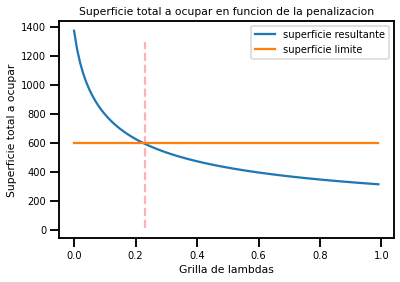

In [32]:
# imprimimos en pantalla la superficie resultante de cada iteracion en funcion de los valores de lambda

plt.plot(np.arange(0.0, 1, 0.01),s_total_i, label = 'superficie resultante')
plt.title('Superficie total a ocupar en funcion de la penalizacion')
plt.xlabel('Grilla de lambdas')
plt.ylabel('Superficie total a ocupar')
plt.plot(np.arange(0.0, 1, 0.01),np.full((100),600), label = 'superficie limite')
plt.vlines(0.23, ymin = 10, ymax = 1300, linestyles= '--',colors = 'r', alpha = 0.3)

plt.legend()
plt.show()

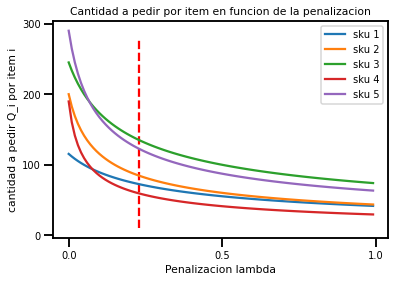

In [31]:
plt.plot(np.arange(0.0, 1, 0.01),q_vec_i[:,0], label = 'sku 1')
plt.plot(np.arange(0.0, 1, 0.01),q_vec_i[:,1], label = 'sku 2')
plt.plot(np.arange(0.0, 1, 0.01),q_vec_i[:,2], label = 'sku 3')
plt.plot(np.arange(0.0, 1, 0.01),q_vec_i[:,3], label = 'sku 4')
plt.plot(np.arange(0.0, 1, 0.01),q_vec_i[:,4], label = 'sku 5')
plt.vlines(0.23, ymin = 10, ymax = 280, linestyles= '--',colors = 'r')
plt.legend()
plt.title('Cantidad a pedir por item en funcion de la penalizacion')
plt.xlabel('Penalizacion lambda')
plt.ylabel('cantidad a pedir Q_i por item i')
#plt.xticks(np.arange(100), np.arange(100)/10, rotation=90)
plt.locator_params(nbins=4)
plt.show()

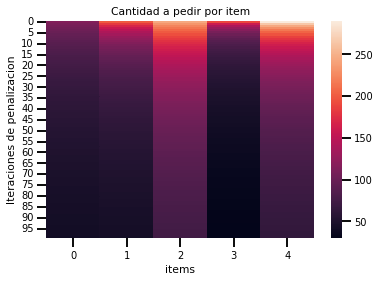

In [24]:
sns.heatmap(q_vec_i)
plt.xlabel('items')
plt.ylabel('Iteraciones de penalizacion')
plt.title('Cantidad a pedir por item')
plt.show()

In [10]:
lambda_final = 0.37